In [167]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Garch(2,2) Model

### First I will define first 2 elements of normal time series and volatility time series, and then create a simulated time series based on garch formula.

### Reason to create garch data like this to check if we can get the same parameters back after fitting the garch model back to the simulated time series.

### $ a_{t} = \epsilon_{t} * \sqrt {\omega + \alpha_{1}*a_{t-1}^{2} + \alpha_{2}*a_{t-2}^{2} + \beta_{1}*\sigma_{t-1}^{2} + \beta_{2}*\sigma_{t-2}^{2}}$

### What ever is under square root above is the volatility component

### $ a_{0},  a_{1} \sim \mathcal{N}(0,1) $

### $ \sigma_{0}, \sigma_{1} = 1, 1$

### $ \epsilon_{t} \sim \mathcal{N}(0,1)$

In [168]:
"""dataset creation based on above conditions"""

n = 1000

"""These are just random numbers"""
omega = 0.5

alpha_1 = 0.1 # remember if you keep these variable high value, your simulated time series will explode
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

In [169]:
"""Both time series and it's volatility time series"""

time_series = [gauss(0,1), gauss(0,1)]
vol_time_series = [1, 1]

In [170]:
""" Simulating time series based on garch formula"""

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*time_series[-1]**2 + alpha_2*time_series[-2]**2 + beta_1*vol_time_series[-1]**2 + beta_2*vol_time_series[-2]**2)
    new_time_series = gauss(0,1) * new_vol
    
    vol_time_series.append(new_vol)
    time_series.append(new_time_series)

Text(0.5, 1.0, 'Simulated Garch(2,2) data')

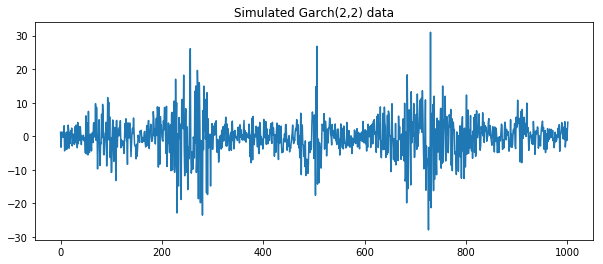

In [171]:
plt.figure(figsize=(10, 4))
plt.plot(time_series)
plt.title("Simulated Garch(2,2) data")

## We can observe that volatility is high in some regions while low in other regions

Text(0.5, 1.0, 'Volatility of above time series')

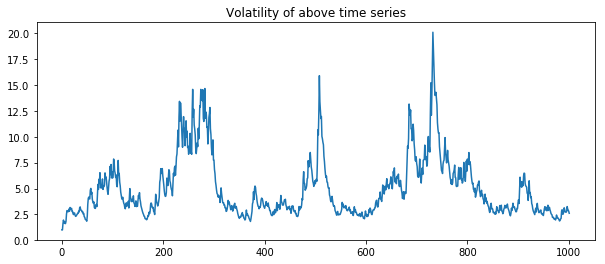

In [172]:
plt.figure(figsize=(10,4))
plt.plot(vol_time_series)
plt.title("Volatility of above time series")

## It can be observe that volatility plot correctly describe what we observed above.

Text(0.5, 1.0, "Comparison of time series data and it's volatility time series")

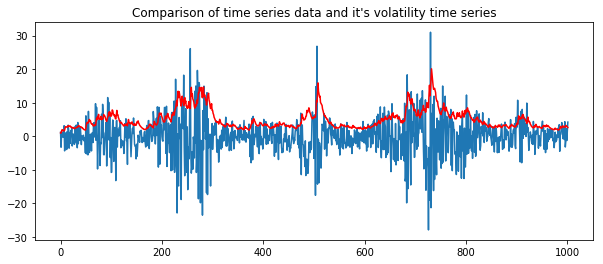

In [173]:
plt.figure(figsize=(10,4))
plt.plot(time_series)
plt.plot(vol_time_series, color="red")
plt.title("Comparison of time series data and it's volatility time series")

## Now we will identify what the AR and MA terms in the volatility time series by plotting PACF for AR and ACF for MA terms. 

## Look into plot of square ff your time series for PACF and ACF plot, look into above main equation for GARCH model

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


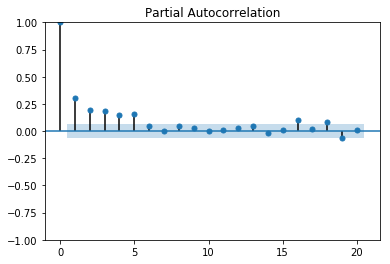

In [174]:
square_time_series = np.array(time_series)**2
plot_pacf(square_time_series, lags=20)
plt.show()

## PACF plot will directly show us what Garch model to use, if it shows 2 , then will use 2 terms of time series and also volatility series. Although above graph also 3, 4 as significant but we can assume that it is Shutting off significantly after there.

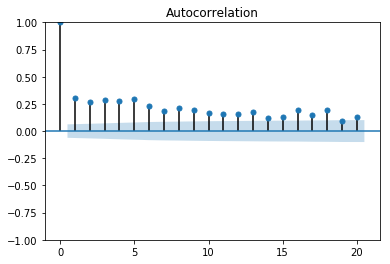

In [175]:
plot_acf(square_time_series, lags=20)
plt.show()

## ACF plot shows lots of significant correlation terms but remember it only proves the numbers of error terms to be included i.e. error term in square series which is no where used in our model, so it does not convey anything and should not be used for anything

In [176]:
"""spliting data set in Train and Test"""

test_size = int(n*0.9)
train, test = time_series[:test_size], time_series[test_size:]

In [177]:
model = arch_model(train, p=2, q=2)

In [178]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2326143490.131575
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3980.943106187404
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3437.157059349429
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2683.6329940130536
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2644.699944254618
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2662.9313387719444
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2658.594181910168
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2642.966640352242
Iteration:      9,   Func. Count:     75,   Neg. LLF: 2641.9843982508914
Iteration:     10,   Func. Count:     82,   Neg. LLF: 2641.9702974317634
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2641.969585812526
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2641.969566116134
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2641.9695661161077
Optimization terminated successfully    (Exit mode 0)
     

In [179]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2641.97
Distribution:                  Normal   AIC:                           5295.94
Method:            Maximum Likelihood   BIC:                           5324.75
                                        No. Observations:                  900
Date:                Fri, Jul 15 2022   Df Residuals:                      899
Time:                        16:11:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1337      0.117     -1.146      0.252 [ -0.362,9.497e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6389      0.226      2.824  4.743e-03    [  0.195,  1.082]
alpha[1]       0.0983  3.779e-02      2.603  9.254e-03  [2.428e-02,  0.172]
alpha[2]       0.1604  5.051e-02      3.175  1.497e-03  [6.138e-02,  0.259]
beta[1]        0.5719      0.117      4.874  1.093e-06    [  0.342,  0.802]
beta[2]        0.1613  9.388e-02      1.719  8.569e-02 [-2.266e-02,  0.345]
===========================================================================

Covariance estimator: robust
"""

In [180]:
print(f"Actual Omega was {omega}")
print(f"Actual Alpha_1 was {alpha_1}")
print(f"Actual Alpha_2 was {alpha_2}")
print(f"Actual Beta_1 was {beta_1}")
print(f"Actual Beta_2 was {beta_2}")

Actual Omega was 0.5
Actual Alpha_1 was 0.1
Actual Alpha_2 was 0.2
Actual Beta_1 was 0.3
Actual Beta_2 was 0.4


## Results are quite off but consider it for a learning process

# Predict on test set

In [191]:
predictions = model_fit.forecast(horizon=len(test), reindex=True)

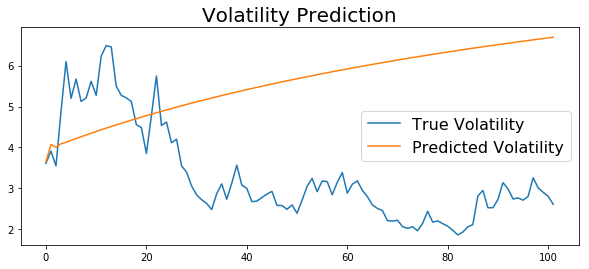

In [207]:
plt.figure(figsize=(10, 4))
plt.plot(vol_time_series[test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1,:]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [200]:
predictions.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100,h.101,h.102
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
dir(predictions)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mean',
 '_residual_variance',
 '_sim',
 '_variance',
 'mean',
 'residual_variance',
 'simulations',
 'variance']